# **Aprendendo sobre clusters com Alura**
<center>
<img src="../img/andreson.png" />
</center>

**Autor:** Andreson Almeida Azevedo

Este notebook esta sendo construindo, utilizando os conhecimento iniciais sobre análise de cluster em python, utilizando como referências o curso [Alura](https://cursos.alura.com.br/course/cluster-analysis). Irei utilizar inicialmente a seguinte [Base de dados](https://www.kaggle.com/datasets/arjunbhasin2013/ccdata) que esta disponível no Kaggle.

## Importando as bibliotecas

In [185]:
# dados
import pandas as pd
import numpy as np

# pre-processamento
from sklearn.preprocessing import Normalizer

# algoritmos cluster
from sklearn.cluster import KMeans

# métricas de validação
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

# Visualizações
import matplotlib.pyplot as plt
import seaborn as sns

# salvar e carregar modelo

import pickle

In [11]:
df = pd.read_csv('../data/CC GENERAL.csv')
df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

Alguns desses atributos podem não ser necessários na nossa clusterização, como 'CUST_ID', que é o ID do usuário, e 'TENURE', duração do contrato.

In [12]:
df.drop(columns=['CUST_ID','TENURE'], inplace=True)
df.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  
0   201.802084        139.509787          0.000000  
1  4103.032597       1072.340217          0.222222  
2   622.066742        627.284787          0.000000  
3     0.000000               NaN          0.000000  
4   678.334763        244.791237          0.000000

## Verificando a existencia dos dados faltantes

In [14]:
miss = df.isna().sum()
miss

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64

Substituindo os dados faltantes pela mediana

In [15]:
df.fillna(df.median(), inplace=True)
df.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64

## Coletando a Descritiva

In [16]:
df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8950.000000   
mean                 0.135144          3.248827      14.709832   4494.282473   
std                  0.200121          6.824647      24.857649   3638.646702   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  
count   8950.000000       8950.000000       8950.000000  
mean    1733.143852        844.906767          0.153715  
std     2895.063757       2332.792322          0.292499  
min        0.000000          0.019163          0.000000  
25%      383.276166        170.857654          0.000000  
50%      856.901546        312.343947          0.000000  
75%     1901.134317        788.713501          0.142857  
max    50721.483360      76406.207520          1.000000

Os dados estão em escalas bem diferentes, isso pode impactar os algoritmos de cluster, precisamos padronizalos de alguma maneira

In [21]:
values = Normalizer().fit_transform(df.values)
print(values)

[[3.93555441e-02 7.87271593e-04 9.17958473e-02 ... 1.94178127e-01
  1.34239194e-01 0.00000000e+00]
 [2.93875903e-01 8.34231560e-05 0.00000000e+00 ... 3.76516684e-01
  9.84037959e-02 2.03923046e-05]
 [3.10798149e-01 1.24560965e-04 9.63068011e-02 ... 7.74852335e-02
  7.81351982e-02 0.00000000e+00]
 ...
 [2.27733092e-02 8.11060955e-04 1.40540698e-01 ... 7.90986945e-02
  8.02156174e-02 2.43318384e-04]
 [2.65257948e-02 1.64255731e-03 0.00000000e+00 ... 1.03579625e-01
  1.09898221e-01 4.92767391e-04]
 [1.86406219e-01 3.33426837e-04 5.46778061e-01 ... 3.15915455e-02
  4.41568390e-02 0.00000000e+00]]


## Rodando o Algoritmo de Clusterização

Para rodar o algoritmo precisamos inicialmente fornecer um número de cluster, iremos definir
arbitrariamente um número de clusters, mas como veremos a seguir, existem tecnicas que permitem selecionar um número ótimo de clusters para a análise.

In [179]:
# setando o modelo
kmeans = KMeans(n_clusters = 5, n_init=10, max_iter=300)

In [180]:
# aplicando o predict

y_pred = kmeans.fit_predict(values)

Precisamos validar os clusters ? Estão bem separados ? Só faz sentindo avançar para a parte de interpretação se os clusters forem validados!

Métricas de validação

* Externas : necessárias os labesl
* Internas : não precisam de labels: 
    * Compactação: Quão próximos estão os pontos em um mesmo cluster;
        * Coeficiente de silhoutte:
        $$s = \dfrac{\beta-\alpha}{max(\alpha,\beta)}$$
        $\alpha$ - é a distância média entre o ponto e todos os outros pontos dentros do cluster;       
        $\beta$ - é a distância média entre o ponto e todos os outros pontos do cluster mais próximo. (Buscar melhor essa definição na teoria)
        O valor do silhoutte esta entre -1 e 1, no curso fala que se o valor de silhoutte positivo, é melhor (se não me engano, na literatura afirma que quanto maior o coeficiente melhor, então deve se testar diversos tamanhos de grupo para entender o mais adequado)
        
    * Separação: Quão bem estão os separados os pontos em clusters diferentes. 
  
  * Índice de Davies-Bouldin
        $$DB = \dfrac{1}{k}\sum_{i =1}^{k}\max\limits_{i\neq j}R_{ij}$$  

    onde $R_{ij} = \dfrac{s_{i}+ s_{j}}{d_{ij}}$, é uma medida de similaridade, entre os clusters i e j.    
        s - é a distância média entre cada ponto do cluster e seu **centroide** (mede compactação);   
        d - é a distância média entre os centroides dos clusters (mede separação).

    * Índice de Caliski-Harabasz

    $$s = \dfrac{tr(B_{k})}{tr(W_{k})} \times \dfrac{n_{E} - k}{k -1}$$

   $n_{E}$ - número de elementos
   k -  número de clusters
   $B_{k}$ - dispersão dos elementos entre(Between) clusters
    $$B_{k} = \sum_{q=1}^{k}n_{q}(c_{q}-c_{E})(c_{q} - c_{E})^{T}$$
    
    onde k é o número de cluster
    q é o cluster
    nq é o número de elementos no cluster
    cq é o centroide do cluster
    ce é o centroide dos elementos

   $W_{k}$ - dispersão dos elementos dentro(Within) do clusters
    $$W_{k} = \sum_{q=1}^k\sum_{x \in C_{q}}(x - c_{q})(x - c_{q})^T$$

    $\sum_{x \in C_{q}}(x - c_{q})(x - c_{q})^T$ é a matriz de variância e covariância
    tr - traço, é a soma das diagonais da matriz


    

In [181]:
labels = kmeans.labels_
silhouette_score(values,labels, metric='euclidean') # métric é o método de calculo da distância entre os pontos

0.36454479258047573

In [175]:
davies_bouldin_score(values, labels)

1.0759109484969387

In [176]:
calinski_harabasz_score(values, labels)

3431.7941358665316

In [177]:
def clustering_algorithm(n_clusters, df_ref):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=300)
    labels = kmeans.fit_predict(df_ref)
    s = silhouette_score(df_ref, labels, metric="euclidean")
    dbs = davies_bouldin_score(df_ref, labels)
    calinsky = calinski_harabasz_score(df_ref, labels)
    return [n_clusters, s, dbs, calinsky]

In [4]:
df_metricas = pd.DataFrame()
for k in [3,4,5,6,7,8,9,10,50]:
    df_metricas= pd.concat(df_metricas,pd.DataFrame(clustering_algorithm(k, values)), index = 0)

NameError: name 'pd' is not defined

In [120]:
df_metricas = df_metricas.rename(columns={0:'k', 1:'silhoutte', 2: 'davies_bouldin', 3:'calinski_harabaz'})
df_metricas.head()

k  silhoutte  davies_bouldin  calinski_harabaz
0   3.0   0.327220        1.309607       3526.440520
0   5.0   0.364439        1.075879       3431.782548
0  50.0   0.244122        1.223734       1614.708068

Comparar os resultados com um conjunto de dados aleatorio de dados para avaliar, se realmente o conjunto de variáveis ajuda a clusterizar os grupos

In [122]:
df.shape

(8950, 16)

## 
# 
# Verificar se o conjunto de variáveis tem um efeito de agrupamento do qu

Comparar os resultados com um conjunto de dados aleatorio de dados para avaliar, se realmente o conjunto de variáveis ajuda a clusterizar os grupos

In [126]:
random_data = np.random.rand(8950, 16)

df_metricas = pd.DataFrame()
for k in [5]:
    df_metricas= df_metricas.append(pd.DataFrame(clustering_algorithm(k, random_data)).T)
df_metricas = df_metricas.rename(columns={0:'k', 1:'silhoutte', 2: 'davies_bouldin', 3:'calinski_harabaz'})
df_metricas.head()

C:\Users\andre\AppData\Local\Temp\ipykernel_26352\2018606135.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_metricas= df_metricas.append(pd.DataFrame(clustering_algorithm(k, random_data)).T)


k  silhoutte  davies_bouldin  calinski_harabaz
0  5.0   0.040024        3.485473        304.396653

## Validar a estabilidade dos clusters

Separamos a base em parte diferente, para avaliar se as métricas irão ter mudanças
se as metricas não tiverem grandes mudanças temos evidências que os cluster estão estáveis

In [128]:
set1, set2, set3 = np.array_split(values, 3)
print(clustering_algorithm(5, set1))
print(clustering_algorithm(5, set2))
print(clustering_algorithm(5, set3))

[5, 0.3688486109603572, 1.058820211490599, 1204.0640491384652]
[5, 0.3532183246410258, 1.1429408609552179, 1194.9401425417568]
[5, 0.36110495792633085, 1.1543279383145229, 1159.002005644296]


A comparar diferentes configurações do k-means por meio da validação relativa;
A validar a estrutura dos clusters;
A verificar a estabilidade dos clusters.

## Interpretar os resultados dos clusters

Text(0, 0.5, 'Valor total gasto')

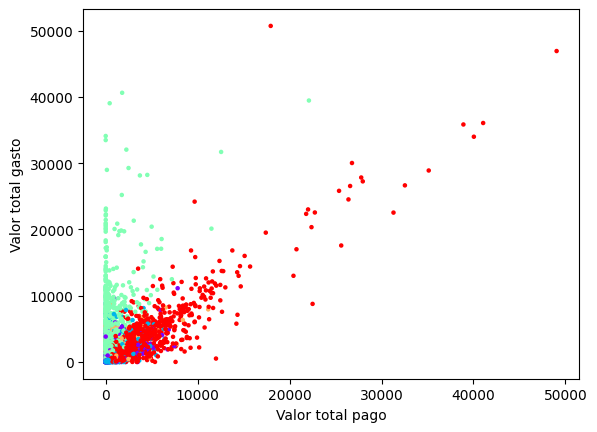

In [131]:
plt.scatter(df['PURCHASES'], df['PAYMENTS'], c=labels, s=5, cmap='rainbow')
plt.xlabel('Valor total pago')
plt.ylabel('Valor total gasto')

Cluster mais a esquerda - Uma concetração de clientes no eixo y clientes que gastaram mais não pagaram a fatura
ou pagaram pouco

O cluster em vermelho, podemos ver os clientes que gastaram mais e pagaram mais, e conseguimos
ver que eles costumam pagar os valores que gastaram.

Mas não é suficiente visualizar desta forma

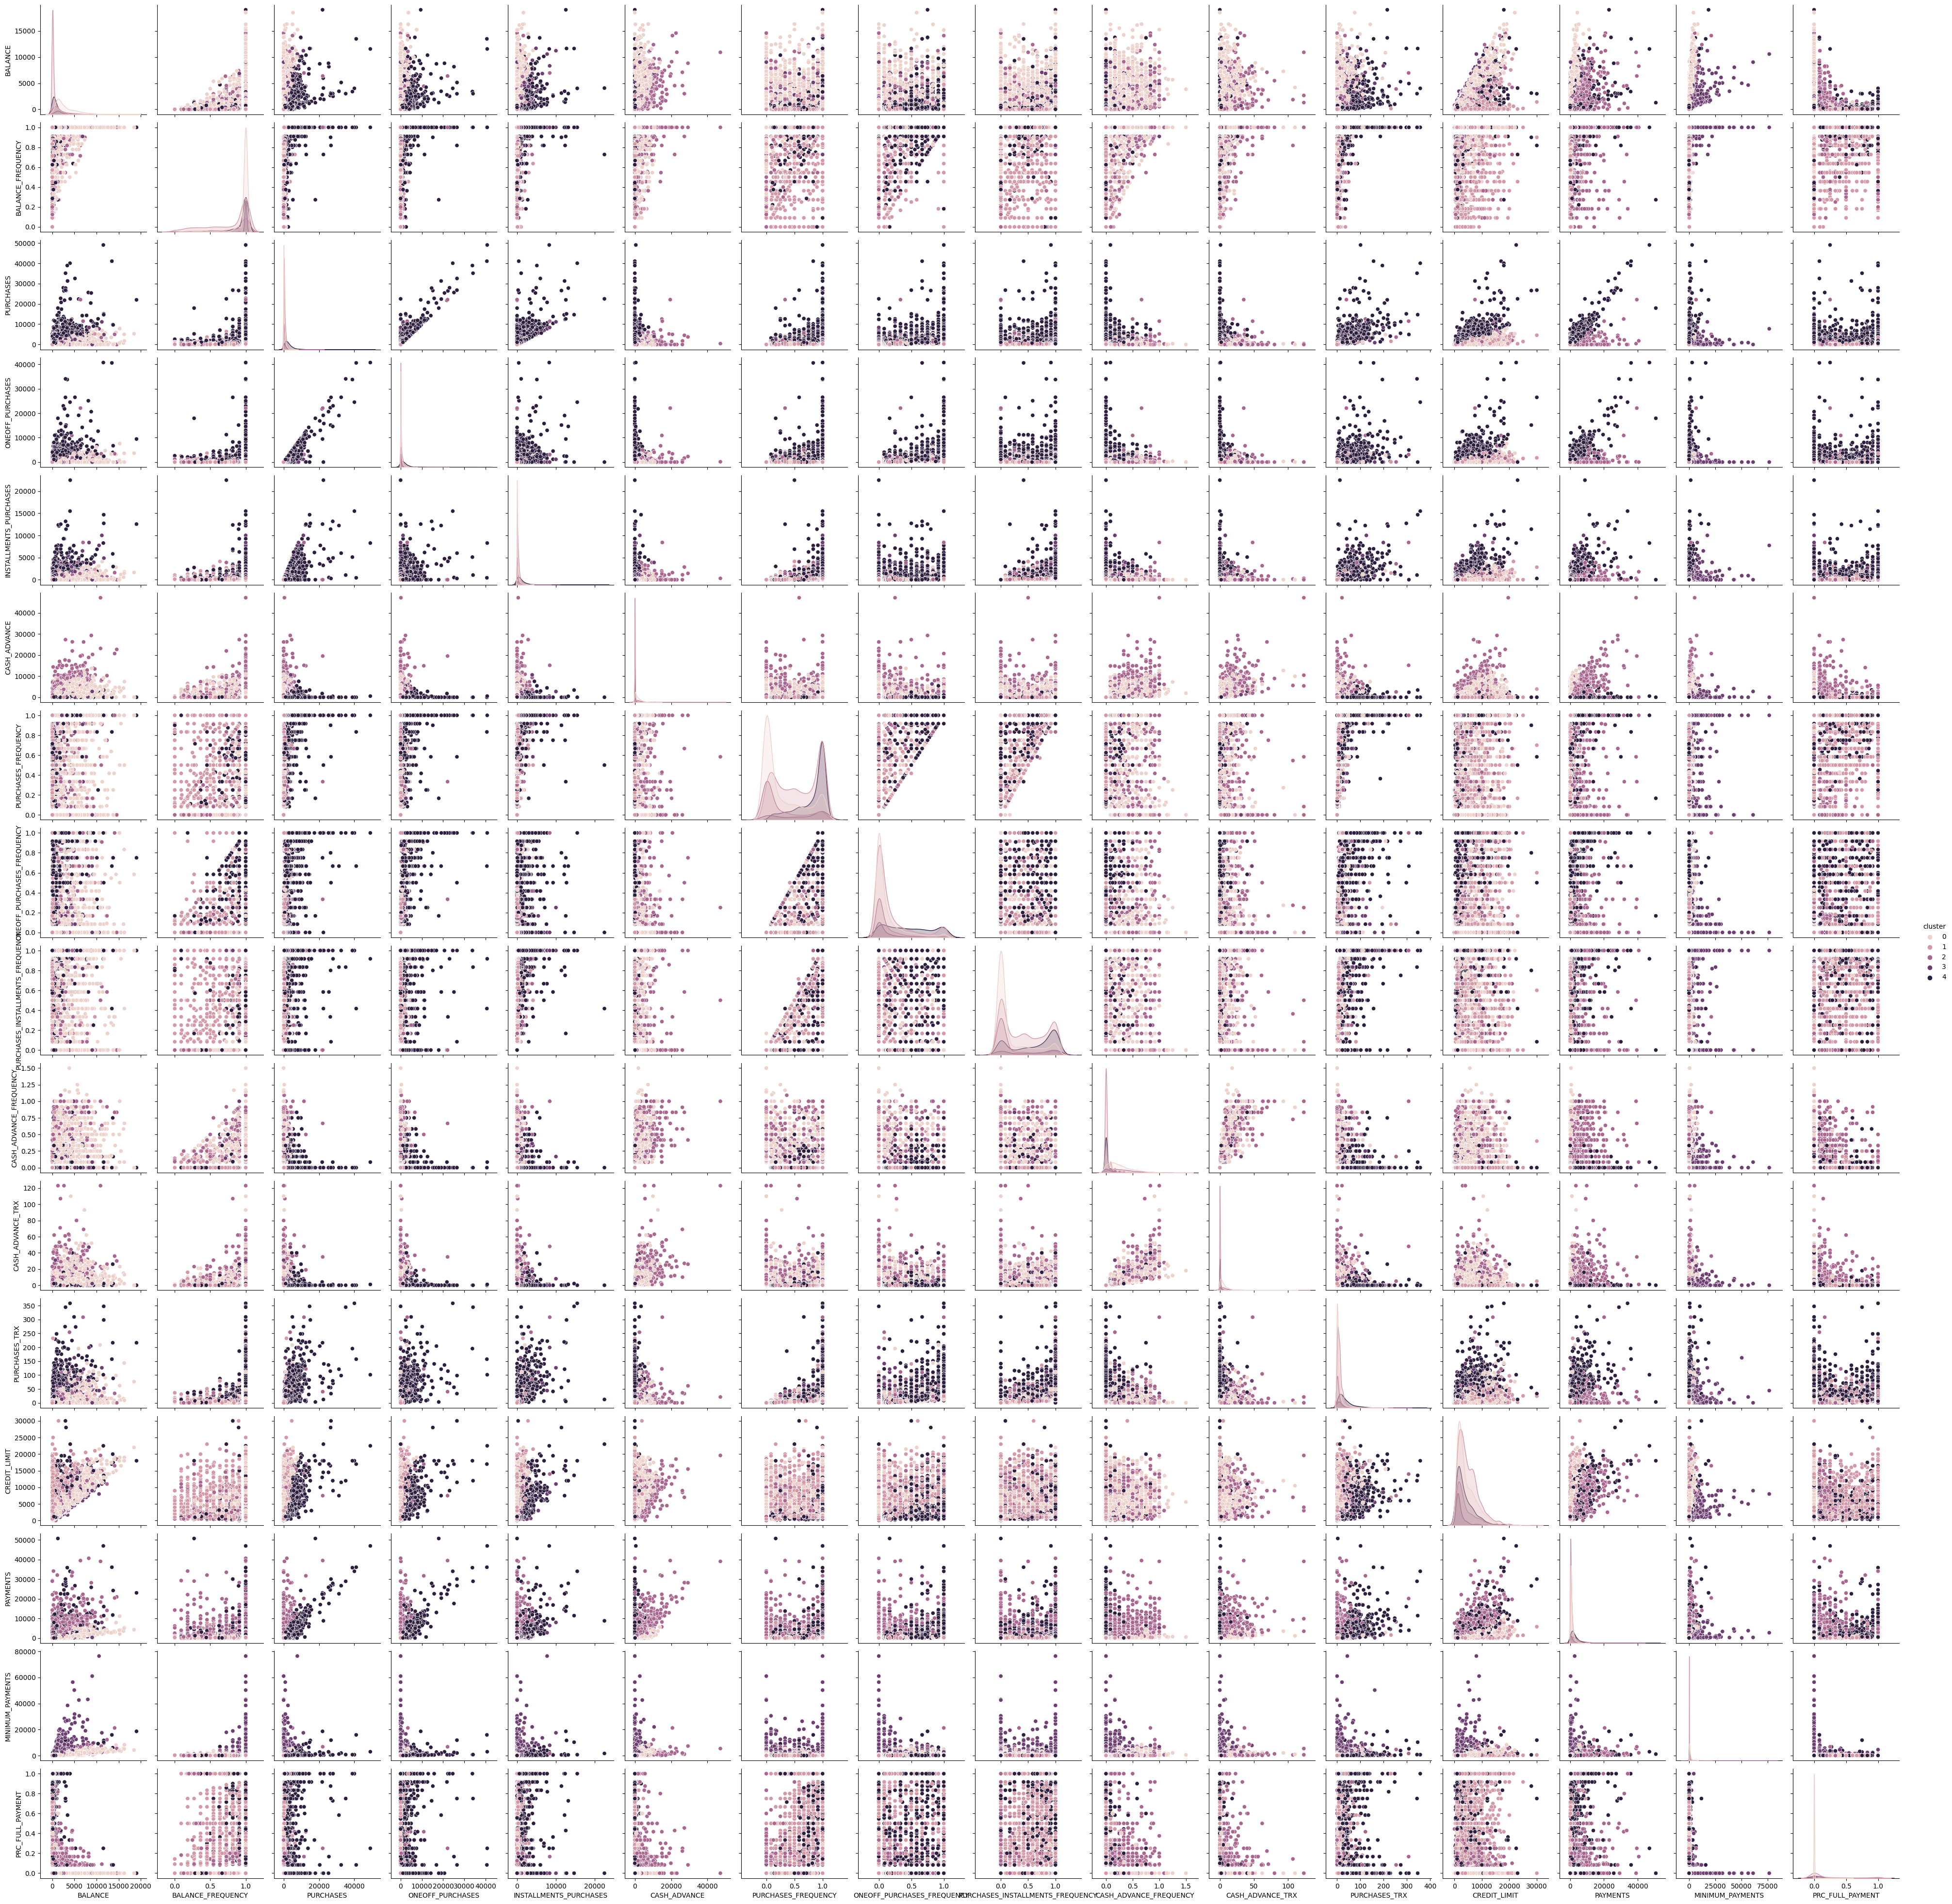

In [135]:
df['cluster'] = labels

sns.pairplot(df[0:], hue="cluster")

Visualizar clusters é bem dificil, então temos que ver de outra forma, uma maneira
é por meio dos valores descritivos

In [182]:
df.groupby('cluster').describe()

BALANCE                                                    \
          count         mean          std        min          25%   
cluster                                                             
0        2651.0  3036.509818  2478.358491   6.824905  1257.895616   
1        3280.0   443.746756   846.398201   0.000000    23.365333   
2        1074.0  1796.066730  1981.709522   0.000000   507.348768   
3         408.0  1990.318603  1860.968409  70.794108  1016.567882   
4        1537.0  1142.320861  1664.363459   0.000000   212.282538   

                                                BALANCE_FREQUENCY            \
                 50%          75%           max             count      mean   
cluster                                                                       
0        2171.222526  4223.849965  18495.558550            2651.0  0.963809   
1          82.941478   410.126095   9630.367575            3280.0  0.774389   
2        1092.020518  2319.052556  14581.459140            1074.0  0.862285   
3        1326.681742  2149.639085  11670.179850             408.0  0.989409   
4         555.131027  1370.317105  19043.138560            1537.0  0.928267   

         ... MINIMUM_PAYMENTS               PRC_FULL_PAYMENT            \
         ...              75%           max            count      mean   
cluster  ...                                                             
0        ...      1330.279644   8345.641905           2651.0  0.001798   
1        ...       248.733727   4483.503862           3280.0  0.246806   
2        ...       885.787665  21235.065300           1074.0  0.117321   
3        ...      7184.162991  76406.207520            408.0  0.019460   
4        ...       523.893953  18621.013310           1537.0  0.278150   

                                                      
              std  min  25%       50%       75%  max  
cluster                                               
0        0.023251  0.0  0.0  0.000000  0.000000  0.6  
1        0.346748  0.0  0.0  0.000000  0.444444  1.0  
2        0.186720  0.0  0.0  0.083333  0.142857  1.0  
3        0.091220  0.0  0.0  0.000000  0.000000  1.0  
4        0.367086  0.0  0.0  0.083333  0.545455  1.0  

[5 rows x 128 columns]

Visualmente ainda é custoso, porque são 16 variáveis ainda olhando as demais métricas, mas existem casos, que precisamos de mais atributos, o que vamos fazer? Selecionar alguns atributos
e considerá-los, o que são mais importantes, como escolher os atributos mais importantes?

In [142]:
# colentado os centroides
print(kmeans.cluster_centers_)

[[5.04526580e-01 2.72332745e-04 6.20171708e-02 3.64414607e-02
  2.55974069e-02 2.52329514e-01 6.75600478e-05 2.58663568e-05
  4.51550497e-05 5.73437494e-05 1.15422756e-03 1.33589087e-03
  7.18989200e-01 1.66362861e-01 1.79601509e-01 5.51886878e-07]
 [6.91003939e-02 2.30735820e-04 1.21488582e-01 4.79706676e-02
  7.36181130e-02 2.44793374e-02 1.72814707e-04 3.36627014e-05
  1.40285541e-04 7.93816793e-06 1.25005935e-04 2.86309441e-03
  9.43533996e-01 1.53766191e-01 5.68572256e-02 7.61261275e-05]
 [2.35306625e-01 2.16352812e-04 6.05163989e-02 3.44248410e-02
  2.60967627e-02 3.99956952e-01 5.27259778e-05 2.05044082e-05
  3.52934886e-05 6.54492579e-05 1.57058848e-03 1.12580417e-03
  5.35234813e-01 5.97766487e-01 1.04466914e-01 2.77090123e-05]
 [3.30293653e-01 2.68533239e-04 1.57028833e-01 3.42695419e-02
  1.23148700e-01 5.87967103e-02 1.66137163e-04 2.53359090e-05
  1.47502343e-04 1.95347549e-05 4.32007163e-04 3.86025028e-03
  3.74390286e-01 2.51594336e-01 6.83611752e-01 4.29215417e-06]
 [1.

A ideia é identificar a variância dos atributos entre os clusters, a ideia é identificar
aquelas variáveis que entre os cluster são diferentes, ou seja que tem maior variância

In [157]:
max = len(kmeans.cluster_centers_[0])
for i in range(max):
    print(df.columns.values[i], "\n{:4f}".format(kmeans.cluster_centers_[:, i].var()))

BALANCE 
0.022349
BALANCE_FREQUENCY 
0.000000
PURCHASES 
0.019655
ONEOFF_PURCHASES 
0.007690
INSTALLMENTS_PURCHASES 
0.003582
CASH_ADVANCE 
0.022482
PURCHASES_FREQUENCY 
0.000000
ONEOFF_PURCHASES_FREQUENCY 
0.000000
PURCHASES_INSTALLMENTS_FREQUENCY 
0.000000
CASH_ADVANCE_FREQUENCY 
0.000000
CASH_ADVANCE_TRX 
0.000000
PURCHASES_TRX 
0.000003
CREDIT_LIMIT 
0.036220
PAYMENTS 
0.027944
MINIMUM_PAYMENTS 
0.054912
PRC_FULL_PAYMENT 
0.000000


BALANCE 0.022349                    - Limite disponível dos clientes      
PURCHASES 0.019655                  - Valor total de compras       
INSTALLMENTS_PURCHASES  0.003582        
CASH_ADVANCE 0.022482               - Valor total de saques
CREDIT_LIMIT 0.036220               - Limite de crédito total 
PAYMENTS 0.027944                   - Valor total pago 
MINIMUM_PAYMENTS 0.054912           - Valor mínimo pago por cliente (Ela desconsiderou, porque acha que para análise não vai agregar muito)

Precisamos entender, o que cada elemento representa, e se faz sentido serem analisados juntos
para tirar alguma conclusão, ao analisarmos juntos

In [184]:
description = df.groupby('cluster')['BALANCE','PURCHASES', 'CASH_ADVANCE','CREDIT_LIMIT','PAYMENTS']
n_clientes = description.size()
description = description.mean()
description['n_cliente'] = n_clientes
print(description)

             BALANCE    PURCHASES  CASH_ADVANCE  CREDIT_LIMIT     PAYMENTS  \
cluster                                                                      
0        3036.509818   385.376134   1634.262935   4493.115805   968.393476   
1         443.746756   629.249107    141.482978   5130.547795   814.294226   
2        1796.066730   477.099721   3267.660346   3981.537441  4710.615663   
3        1990.318603   856.504755    424.225892   2231.985294  1340.280120   
4        1142.320861  3273.425517    183.376625   4097.306540  3036.763695   

         n_cliente  
cluster             
0             2651  
1             3280  
2             1074  
3              408  
4             1537  


C:\Users\andre\AppData\Local\Temp\ipykernel_26352\1762170917.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  description = df.groupby('cluster')['BALANCE','PURCHASES', 'CASH_ADVANCE','CREDIT_LIMIT','PAYMENTS']


CLUSTER 0: Clientes com os maiores valores em gastos (balance). Menor valor em compras (PURCHASE). Valor considerável em saques. (Clientes que mais gastam. O foco deles é saque). Piores pagadores. Boa quantidade de clientes

CLUSTER 1: Clientes os menores valores em gastos. Menor valor de saque (Cash_advance) (Clientes que gastam pouco). Clientes com limite mais alto.Bons pagadores. Maior numero de clientes

CLUSTER 2: Maior valor em saques. (Clientes que gastam muito com saques). Pagam as vezes

CLUSTER 3: Limite mais baixo (CREDITO LIMIT), Não são bons pagadores. Menor quantidade de clientes

CLUSTER 4: Melhores pagadores

A variável payments (pagamentos, pode não dar uma informação completa, como)

Refinamento Andreson: 

CLUSTER 0: Clientes que mais gastam. O foco deles é saque. Piores pagadores. Boa quantidade de Clientes

CLUSTER 1: Clientes que gastam pouco. Clientes com maiores limites. Bons pagadores. Maior numero de clientes

CLUSTER 2: Clientes que gastam muito com saques. Pagam as vezes

CLUSTER 3: Clientes com menor limite. Não são bons pagadores. Menor quantidade de clientes

CLUSTER 4: Clientes que mais gastam com compras. Melhores pagadores

In [183]:
df.groupby('cluster')['PRC_FULL_PAYMENT'].describe()

count      mean       std  min  25%       50%       75%  max
cluster                                                               
0        2651.0  0.001798  0.023251  0.0  0.0  0.000000  0.000000  0.6
1        3280.0  0.246806  0.346748  0.0  0.0  0.000000  0.444444  1.0
2        1074.0  0.117321  0.186720  0.0  0.0  0.083333  0.142857  1.0
3         408.0  0.019460  0.091220  0.0  0.0  0.000000  0.000000  1.0
4        1537.0  0.278150  0.367086  0.0  0.0  0.083333  0.545455  1.0

In [200]:
# save the model to disk
#filename = 'finalized_model.sav'
#pickle.dump(kmeans, open(filename, 'wb'))


# save the iris classification model as a pickle file
model_pkl_file = "finalized_model.pkl"  

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(kmeans, file)

In [201]:
# load model from pickle file
with open(model_pkl_file, 'rb') as file:  
    model = pickle.load(file)

In [202]:
model

KMeans(n_clusters=5)

# Referências

* [Analise de Cluster: Curso Alura](https://cursos.alura.com.br/course/cluster-analysis)
* [Cibele Russo: Analise Multivariada e Aprendizado não supervisionado: Video Youtube](https://www.youtube.com/watch?v=aJUFI6BSEJw&list=PLt7qVSwRVn5bg14OLl6dHTNnXVrEM6UiS)
* [Rafinha dos dados: Video Youtube](https://www.youtube.com/watch?v=GBSTT5NBE4g)
* [Cibele Russo: Aula prática](https://www.youtube.com/watch?v=d_CJGaAbC7o&list=PLt7qVSwRVn5bg14OLl6dHTNnXVrEM6UiS&index=27)
* [Cibele Russo: Aprendizado de máquina](https://www.youtube.com/playlist?list=PLt7qVSwRVn5Z3ffZsKBnt7YQcFjkVfb0t)
* [Rini Christy: Notebook Kaggle kmedoids](https://www.kaggle.com/code/rinichristy/prediction-of-k-medoids-clusters-of-kc-data)
* [Dúvida forúm alura sobre DBSCAN](https://cursos.alura.com.br/forum/topico-clusterizacao-com-meanshift-e-dbscan-so-consegui-obter-1-cluster-o-que-esta-errado-109373)
* [Cássia Sampaio: Stack Abuse: DBSCAN com scikit-Learn](https://stackabuse.com/dbscan-with-scikit-learn-in-python/)
* [Karnika kapoor Notebook kaggle Segmentação de Clientes](https://www.kaggle.com/code/karnikakapoor/customer-segmentation-clustering)
* [Pannmie Notebook Kaggle DS Salary](https://www.kaggle.com/code/tumpanjawat/ds-salary-full-eda-geo-cluster-xgboost): Apresentação e pré-processamento interessantes
* [Janio Martinez Bachmann: Notebook kaggle clustering e regressão](https://www.kaggle.com/code/janiobachmann/patient-charges-clustering-and-regression)